### Importing necessary libraries

In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ecg_plot

import heartpy as hp

import sklearn.preprocessing as sk_preprocess

import sklearn.decomposition as sk_decomp

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

#from sklearn.preprocessing import MultiLabelBinarizer

### Read data

In [2]:
data = pd.DataFrame(arff.loadarff('ECG5000_TRAIN.arff')[0])

In [3]:
data_array=np.array(data)

In [4]:
data

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,b'1'
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,b'1'
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,b'1'
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,b'1'
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,-1.359872,...,1.160885,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161,b'4'
496,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,-0.891843,...,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958,b'4'
497,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,-1.690706,...,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028,b'4'
498,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,-0.434310,...,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534,b'5'


In [5]:
data['target']=data['target'].map(dict({b'1': 0, b'2': 1, b'3': 2, b'4': 3, b'5': 4}))

### Function to OneHotEncode the target labels

In [6]:
def oheColumn(oheData, columnName):
    oneHotEnc = sk_preprocess.OneHotEncoder(dtype=int, handle_unknown='ignore')

    oheDataColumn = oneHotEnc.fit_transform(oheData[[columnName]]).toarray()

    oheData[oneHotEnc.categories_[0]] = oheDataColumn

    for catCol in oneHotEnc.categories_[0]:
        oheData.rename(columns = {catCol:columnName+'_'+catCol}, inplace = True)
    
    return oheData

In [7]:
y = data['target']
X = data.drop('target', axis=1)

### Plot the ECG data

C:\Users\vivek\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\vivek\anaconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\vivek\anaconda3\lib\site-packages\numpy\ma\core.py:5288: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\vivek\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\vivek\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


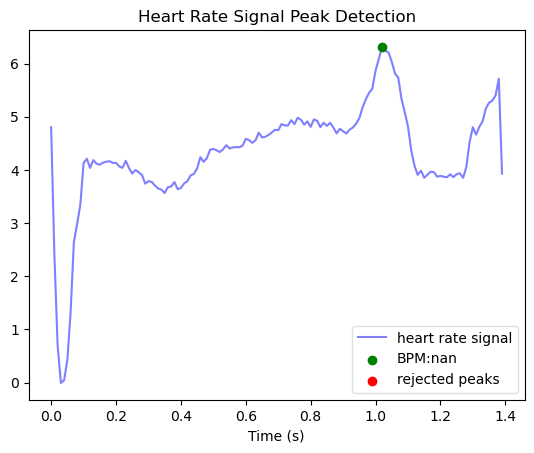

In [8]:
working_data, measures = hp.process(np.delete(data_array[3], -1), 100.0)
hp.plotter(working_data, measures)

### Correlation of features

In [9]:
data_corr=data.corr()

In [10]:
correlated_features=data_corr[(data_corr > 0.3) | (data_corr < -0.3)].stack().index
correlated_features_df=pd.DataFrame(correlated_features)
correlated_features_df=pd.DataFrame(correlated_features_df[0].tolist(),index=correlated_features_df.index)
correlated_features_df=correlated_features_df[correlated_features_df.loc[:,0] != correlated_features_df.loc[:,1]]

In [11]:
correlated_features_df

,0,1
1,att1,att2
2,att1,att3
3,att1,att4
4,att1,att96
5,att1,att97
...,...,...
9603,target,att135
9604,target,att136
9605,target,att137
9606,target,att138


The features are highly correlated as seen this result. It shows the correlations where **|correlation between features|>0.3**.

### Split data into test and train data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Standardizing features to reduce bias

In [13]:
def standardize(data):
    sc = sk_preprocess.StandardScaler()
    return sc.fit_transform(data)
 
X_train_sc_processed = standardize(X_train)
X_test_sc_processed = standardize(X_test)

### Applying PCA

In [14]:
pca = sk_decomp.PCA(n_components=30)

def pcaFitData(data):
    return pca.fit_transform(data)
    
def pcaTransformData(data):
    return pca.transform(data)

def pcaRetrieveVariance():
    return pca.explained_variance_ratio_

In [15]:
X_train_processed = pcaFitData(X_train_sc_processed)
X_test_processed = pcaTransformData(X_test_sc_processed)
 
explained_variance = pcaRetrieveVariance()

### Performing Logistic regression for Multiclass classification

In [16]:
logisticRegModel = LogisticRegression()

def logisticFit(X, y):
    return logisticRegModel.fit(X, y)

logisticRegModel_trained = logisticFit(X_train_processed, y_train)

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


>Name:20 	Mean:0.891 (Scores:0.050)
>Name:21 	Mean:0.889 (Scores:0.053)
>Name:22 	Mean:0.904 (Scores:0.051)
>Name:23 	Mean:0.904 (Scores:0.056)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:24 	Mean:0.893 (Scores:0.050)
>Name:25 	Mean:0.896 (Scores:0.051)
>Name:26 	Mean:0.900 (Scores:0.048)
>Name:27 	Mean:0.896 (Scores:0.048)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:28 	Mean:0.898 (Scores:0.051)
>Name:29 	Mean:0.898 (Scores:0.051)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


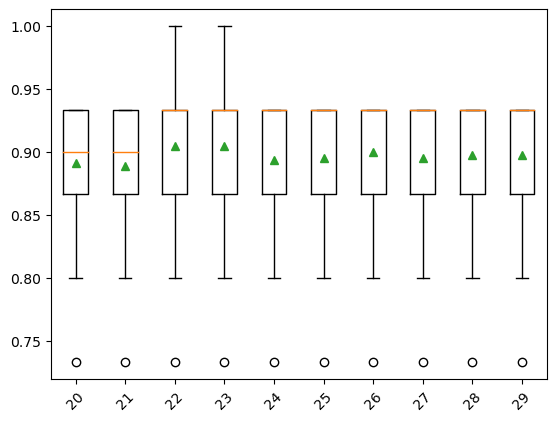

In [17]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get a list of models to evaluate
def get_models(X):
    models = dict()
    for i in range(20,min(50, X.shape[1])):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# #get data
# y = data['target']
# X = data.drop('target', axis=1)
#print(X,y)

def evaluatePCA(X, y):
    # get the models to evaluate
    models = get_models(X)
    # evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>Name:%s \tMean:%.3f (Scores:%.3f)' % (name, mean(scores), std(scores)))
    # plot model performance for comparison
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.xticks(rotation=45)
    pyplot.show()
    
evaluatePCA(X_test_processed, y_test)

### Shuffling columns and applying PCA

In [18]:
def shuffleColumns(data):
    return data[np.random.default_rng(seed=42).permutation(data.columns.values)]
X_test_shuffled = shuffleColumns(X_test)

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:20 	Mean:0.904 (Scores:0.051)
>Name:21 	Mean:0.900 (Scores:0.048)
>Name:22 	Mean:0.900 (Scores:0.048)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:23 	Mean:0.900 (Scores:0.048)
>Name:24 	Mean:0.902 (Scores:0.048)
>Name:25 	Mean:0.902 (Scores:0.048)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:26 	Mean:0.904 (Scores:0.051)
>Name:27 	Mean:0.902 (Scores:0.048)
>Name:28 	Mean:0.902 (Scores:0.048)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:29 	Mean:0.904 (Scores:0.051)
>Name:30 	Mean:0.904 (Scores:0.051)
>Name:31 	Mean:0.904 (Scores:0.051)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:32 	Mean:0.902 (Scores:0.051)
>Name:33 	Mean:0.902 (Scores:0.051)
>Name:34 	Mean:0.900 (Scores:0.054)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:35 	Mean:0.900 (Scores:0.051)
>Name:36 	Mean:0.904 (Scores:0.054)
>Name:37 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:38 	Mean:0.904 (Scores:0.051)
>Name:39 	Mean:0.907 (Scores:0.050)
>Name:40 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:41 	Mean:0.907 (Scores:0.050)
>Name:42 	Mean:0.907 (Scores:0.050)
>Name:43 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:44 	Mean:0.907 (Scores:0.050)
>Name:45 	Mean:0.907 (Scores:0.050)
>Name:46 	Mean:0.907 (Scores:0.050)


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\vivek\anaconda3\

>Name:47 	Mean:0.907 (Scores:0.050)
>Name:48 	Mean:0.907 (Scores:0.050)
>Name:49 	Mean:0.907 (Scores:0.050)


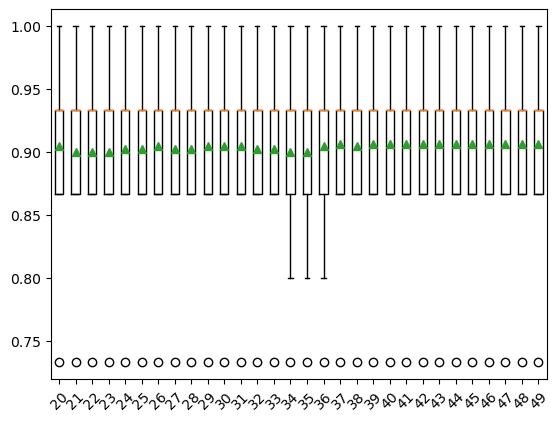

In [19]:
evaluatePCA(X_test_shuffled, y_test)

As seen in the above plot, the data with shuffled columns also yields similar accuracy scores as PCA doesn't consider the order (order matters here as the data is a time series) which is flawed for this particular dataset.<br><br>
So, we need to consider the bias of a column towards its previous columns.

## Alternative approaches to consider time series

### Using RNN

### 1. Using LSTM

In [20]:
from keras.models import Sequential
import keras.layers as kerasLayers
import keras

In [21]:
model = Sequential()

#### 4 Layers of LSTM to understand short term dependencies and further layers for the long term dependencies

In [22]:
def initFit4LayerLSTM(X, y):    
    model.add(kerasLayers.LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], 1)))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.LSTM(units = 50, return_sequences = True))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.LSTM(units = 50, return_sequences = True))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.LSTM(units = 50))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.Dense(units = 5, activation='softmax'))

    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

    model.fit(X, y, epochs = 100, batch_size = 32)

In [23]:
initFit4LayerLSTM(X_train, y_train)

Epoch 1/100
11/11 [==============================] - 6s 131ms/step - loss: 1.3567
Epoch 2/100
11/11 [==============================] - 2s 147ms/step - loss: 0.8262
Epoch 3/100
11/11 [==============================] - 1s 136ms/step - loss: 0.5655
Epoch 4/100
11/11 [==============================] - 1s 120ms/step - loss: 0.3688
Epoch 5/100
11/11 [==============================] - 1s 122ms/step - loss: 0.2961
Epoch 6/100
11/11 [==============================] - 1s 119ms/step - loss: 0.2704
Epoch 7/100
11/11 [==============================] - 1s 115ms/step - loss: 0.2333
Epoch 8/100
11/11 [==============================] - 1s 115ms/step - loss: 0.2245
Epoch 9/100
11/11 [==============================] - 1s 117ms/step - loss: 0.2168
Epoch 10/100
11/11 [==============================] - 1s 119ms/step - loss: 0.2084
Epoch 11/100
11/11 [==============================] - 1s 116ms/step - loss: 0.1972
Epoch 12/100
11/11 [==============================] - 1s 110ms/step - loss: 0.1838
Epoch 13/100


11/11 [==============================] - 1s 116ms/step - loss: 0.0491
Epoch 100/100
11/11 [==============================] - 1s 119ms/step - loss: 0.0798


In [24]:
def predict4LayerLSTM(X):
    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    return y_pred

In [25]:
y_predicted = predict4LayerLSTM(X_test)

5/5 [==============================] - 1s 32ms/step


In [26]:
def parametersCalculation(y_pred, y_true):
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_true)

    # Calculate true positives, false positives, true negatives, false negatives
    tp = np.sum((y_pred == 1) & (y_test == 1))
    fp = np.sum((y_pred == 1) & (y_test == 0))
    tn = np.sum((y_pred == 0) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))

    # Calculate precision
    precision = tp / (tp + fp)

    # Calculate recall
    recall = tp / (tp + fn)

    # Calculate F1-score
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Print the calculated metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1_score)

In [27]:
parametersCalculation(y_predicted, y_test)

Accuracy: 0.9266666666666666
Precision: 0.98
Recall: 1.0
F1-score: 0.98989898989899


In [28]:
from sklearn.metrics import confusion_matrix

def displayCofusion(y_true, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix as a heatmap
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(np.arange(5), ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
    plt.yticks(np.arange(5), ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
    plt.title('Confusion Matrix')
    plt.show()

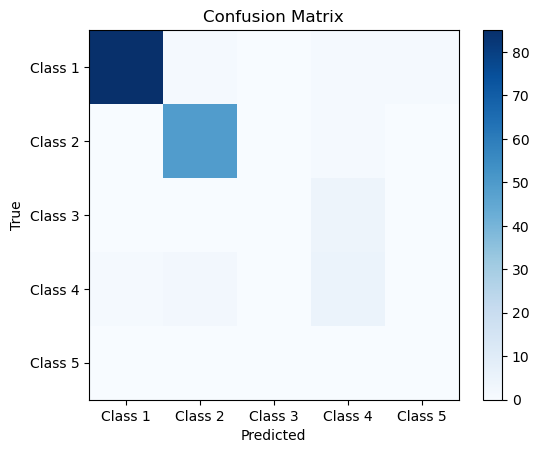

In [29]:
displayCofusion(y_test, y_predicted)

### Testing the LSTM's prediction for X_test with shuffled columns

In [30]:
y_predicted_shuffled = predict4LayerLSTM(X_test_shuffled)

5/5 [==============================] - 0s 41ms/step


In [31]:
parametersCalculation(y_predicted_shuffled, y_test)

Accuracy: 0.1
Precision: 0.0
Recall: 0.0
F1-score: nan


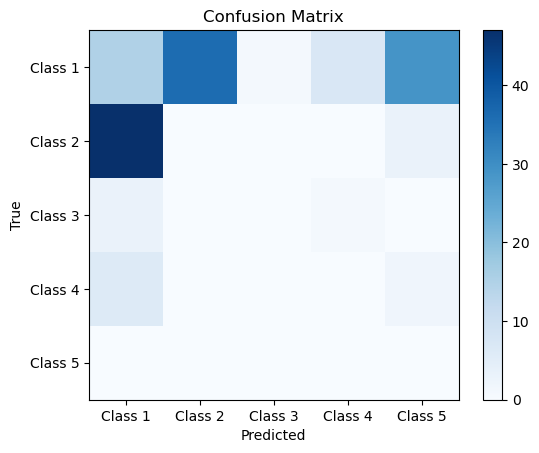

In [32]:
displayCofusion(y_test, y_predicted_shuffled)

The simulation of causality or creating the bias towards the previous data is working as expected as shuffling of the columns did not yield the same result as the unshuffled data. The accuracy is very low meaning that a dependency has been created between the columns.

### 2. Using GRU

In [33]:
model = Sequential()

In [34]:
def initFit4LayerGRU(X, y):    
    model.add(kerasLayers.GRU(units = 50, return_sequences = True, input_shape = (X.shape[1], 1)))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.GRU(units = 50, return_sequences = True))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.GRU(units = 50, return_sequences = True))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.GRU(units = 50))
    model.add(kerasLayers.Dropout(0.2))

    model.add(kerasLayers.Dense(units = 5, activation='softmax'))

    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

    model.fit(X, y, epochs = 100, batch_size = 32)

In [35]:
def predict4LayerGRU(X):
    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    return y_pred

In [36]:
initFit4LayerGRU(X_train, y_train)

Epoch 1/100
11/11 [==============================] - 5s 99ms/step - loss: 1.2898
Epoch 2/100
11/11 [==============================] - 1s 98ms/step - loss: 0.6332
Epoch 3/100
11/11 [==============================] - 1s 102ms/step - loss: 0.4362
Epoch 4/100
11/11 [==============================] - 1s 99ms/step - loss: 0.3834
Epoch 5/100
11/11 [==============================] - 1s 98ms/step - loss: 0.3503
Epoch 6/100
11/11 [==============================] - 1s 97ms/step - loss: 0.3272
Epoch 7/100
11/11 [==============================] - 1s 100ms/step - loss: 0.3011
Epoch 8/100
11/11 [==============================] - 1s 102ms/step - loss: 0.2787
Epoch 9/100
11/11 [==============================] - 1s 98ms/step - loss: 0.2754
Epoch 10/100
11/11 [==============================] - 1s 97ms/step - loss: 0.2428
Epoch 11/100
11/11 [==============================] - 1s 107ms/step - loss: 0.2352
Epoch 12/100
11/11 [==============================] - 1s 99ms/step - loss: 0.2183
Epoch 13/100
11/11 [=

11/11 [==============================] - 1s 107ms/step - loss: 0.0540


In [37]:
y_predicted = predict4LayerGRU(X_test)

5/5 [==============================] - 1s 24ms/step


In [38]:
parametersCalculation(y_predicted, y_test)

Accuracy: 0.9133333333333333
Precision: 1.0
Recall: 0.9791666666666666
F1-score: 0.9894736842105264


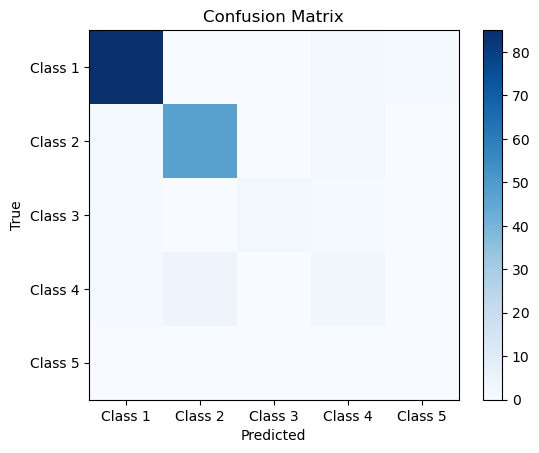

In [39]:
displayCofusion(y_test, y_predicted)

### Testing the GRU's prediction for X_test with shuffled columns

In [40]:
y_predicted_shuffled = predict4LayerLSTM(X_test_shuffled)

5/5 [==============================] - 0s 23ms/step


In [41]:
parametersCalculation(y_predicted_shuffled, y_test)

Accuracy: 0.5866666666666667
Precision: nan
Recall: 0.0
F1-score: nan


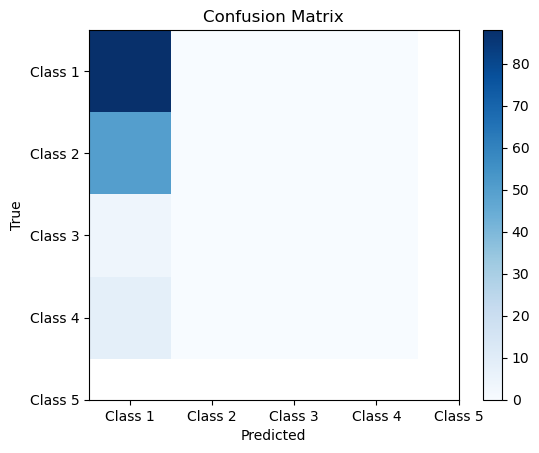

In [42]:
displayCofusion(y_test, y_predicted_shuffled)

The LSTM implementation seems to be more reliable compared to that of GRU and the properties of LSTM are more suitable (long term memeory) for this use case.

### Providing the time series as a vector of various sizes

In [43]:
# time_series_array = np.empty(X.shape[0], dtype=object)
# time_series_array = (X.values).astype(np.float32)
# time_series_array=np.asarray(time_series_array).astype(np.float32)

In [44]:
# X_vector = pd.DataFrame(index=range(time_series_array.shape[0]), columns=range(1))
# print(X_vector, time_series_array.shape[0],time_series_array.shape[1])
# for i in range(time_series_array.shape[0]):
#     print(i)
#     X_vector.loc[i,0] = time_series_array[i]

In [45]:
# X_vector_train, X_vector_test, y_vector_train, y_vector_test = train_test_split(X_vector, y, test_size = 0.3, random_state = 42)

In [46]:
# model = Sequential()
# initFit4LayerGRU(X_vector_train, y_vector_train)

### ARIMA (autoregressive integrated moving average) Modelling

## Other Approaches

In [54]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.svm import SVC

from fastdtw import fastdtw

### Dynamic Time Warping SVM (DTW-SVM)

In [59]:
# Define a custom distance function using DTW
def dtw_distance(x, y):
    distance, _ = fastdtw(x, y)
    return distance

X_train_array = np.array(X_train)

# Compute pairwise distance matrix using DTW distance
n_samples = len(X_train_array)
X_train_array = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(i, n_samples):
        #print(X_train_array)
        dist = dtw_distance(X_train_array[i], X_train_array[j])
        X_train_dtw[i, j] = dist
        X_train_dtw[j, i] = dist

# Dynamic Time Warping SVM (DTW-SVM)
clf_dtwsvm = SVC(kernel="precomputed")
clf_dtwsvm.fit(X_train_dtw, y_train)

KeyboardInterrupt: 

In [ ]:
X_test_array = np.array(X_test)

# Compute pairwise distance matrix using DTW distance
n_samples = len(X_test_array)
X_test_array = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(i, n_samples):
        #print(X_train_array)
        dist = dtw_distance(X_test_array[i], X_test_array[j])
        X_test_dtw[i, j] = dist
        X_test_dtw[j, i] = dist

y_pred = svm_clf.predict(X_test_dtw)

### Support Vector Data Description for Time Series (SVDD-TS)